In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
import time
import scipy.io as io

import skimage.measure
from keras.initializers import RandomNormal
from keras.callbacks import ModelCheckpoint
from keras.models import *
from keras.layers import *
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import model_from_json
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2

In [ ]:
import numpy as np
import tensorflow as tf
import random

np.random.seed(16)
tf.random.set_seed(16)
random.seed(16)

In [ ]:
mall_gt = io.loadmat(".../heads-position/mall_gt.mat")
mall_head_pos = mall_gt['frame'][0]

# Split in Train - Val - Test For 224x224 images

In [ ]:
path_frames_224 = '.../frames224/'

img_names = sorted([file for file in os.listdir(path=path_frames_224) if file.endswith('.jpg')])

test_proportion = 0.2
Train_val_frames_names, Test_frames_names = train_test_split(img_names, test_size=test_proportion, random_state=16)

val_proportion= 0.1
Train_frames_names, Val_frames_names = train_test_split(Train_val_frames_names, test_size=test_proportion, random_state=16)

In [ ]:
Train_imgs_224 = []
Train_labels_224 = []

i=0

for img_name in sorted(os.listdir(path = path_frames_224)):
    i=i+1
    if img_name in Train_frames_names:
        img = preprocess_input(cv2.cvtColor(cv2.imread(path_frames_224 + img_name), cv2.COLOR_BGR2RGB))
        Train_imgs_224.append(img)
        Train_labels_224.append(len(mall_head_pos[i-1][0][0][0]))

Train_imgs_224 = np.asarray(Train_imgs_224)
Train_labels_224 = np.asarray(Train_labels_224)

In [ ]:
Val_imgs_224  = []
Val_labels_224  = []

i=0

for img_name in sorted(os.listdir(path = path_frames_224)):
    i=i+1
    if img_name in Val_frames_names:
        img = preprocess_input(cv2.cvtColor(cv2.imread(path_frames_224 + img_name), cv2.COLOR_BGR2RGB))
        Val_imgs_224.append(img)
        Val_labels_224.append(len(mall_head_pos[i-1][0][0][0]))

Val_imgs_224  = np.asarray(Val_imgs_224)
Val_labels_224  = np.asarray(Val_labels_224)

In [ ]:
Test_imgs_224  = []
Test_labels_224  = []

i=0

for img_name in sorted(os.listdir(path = path_frames_224)):
    i=i+1
    if img_name in Test_frames_names:
        img = preprocess_input(cv2.cvtColor(cv2.imread(path_frames_224 + img_name), cv2.COLOR_BGR2RGB))
        Test_imgs_224.append(img)
        Test_labels_224.append(len(mall_head_pos[i-1][0][0][0]))

Test_imgs_224  = np.asarray(Test_imgs_224)
Test_labels_224   = np.asarray(Test_labels_224)

# Split in Train - Val - Test For 299x299 images

In [ ]:
path_frames_299 = '.../frames299/'

img_names = sorted([file for file in os.listdir(path=path_frames_299) if file.endswith('.jpg')])

test_proportion = 0.2
Train_val_frames_names, Test_frames_names = train_test_split(img_names, test_size=test_proportion, random_state=16)

val_proportion= 0.1
Train_frames_names, Val_frames_names = train_test_split(Train_val_frames_names, test_size=test_proportion, random_state=16)

In [ ]:
Train_imgs_299 = []
Train_labels_299 = []

i=0

for img_name in sorted(os.listdir(path = path_frames_299)):
    i=i+1
    if img_name in Train_frames_names:
        img = preprocess_input(cv2.cvtColor(cv2.imread(path_frames_299 + img_name), cv2.COLOR_BGR2RGB))
        Train_imgs_299.append(img)
        Train_labels_299.append(len(mall_head_pos[i-1][0][0][0]))

Train_imgs_299 = np.asarray(Train_imgs_299)
Train_labels_299 = np.asarray(Train_labels_299)

In [ ]:
Val_imgs_299  = []
Val_labels_299 = []

i=0

for img_name in sorted(os.listdir(path = path_frames_299)):
    i=i+1
    if img_name in Val_frames_names:
        img = preprocess_input(cv2.cvtColor(cv2.imread(path_frames_299 + img_name), cv2.COLOR_BGR2RGB))
        Val_imgs_299.append(img)
        Val_labels_299.append(len(mall_head_pos[i-1][0][0][0]))

Val_imgs_299  = np.asarray(Val_imgs_299)
Val_labels_299  = np.asarray(Val_labels_299)

In [ ]:
Test_imgs_299 = []
Test_labels_299  = []

i=0

for img_name in sorted(os.listdir(path = path_frames_299)):
    i=i+1
    if img_name in Test_frames_names:
        img = preprocess_input(cv2.cvtColor(cv2.imread(path_frames_299 + img_name), cv2.COLOR_BGR2RGB))
        Test_imgs_299.append(img)
        Test_labels_299.append(len(mall_head_pos[i-1][0][0][0]))

Test_imgs_299  = np.asarray(Test_imgs_299)
Test_labels_299   = np.asarray(Test_labels_299)

# MODELS DEFINITION


## INCEPTION V3


In [ ]:
Inc = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = Inc.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='relu')(x)
model = Model(inputs=Inc.input, outputs=predictions)

#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-7, decay=5e-4), loss="mse", metrics=["mae"])
model.compile(optimizer=Adam(learning_rate=1e-5), loss="mae", metrics=["mae"])

checkpoint_filepath_InceptionV3 = './InceptionV3_crowd_counting.weights.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath_InceptionV3,
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True,
    verbose=1)

history_InceptionV3 = model.fit(Train_imgs_299, Train_labels_299,
                    batch_size=32 , epochs=100,
                    validation_data=(Val_imgs_299, Val_labels_299),
                    callbacks=[model_checkpoint_callback])

model.save('InceptionV3_crowd_counting_final.weights.h5')

Epoch 1/100


I0000 00:00:1720950674.783473    6997 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - loss: 30.6168 - mae: 30.6168
Epoch 1: val_mae improved from inf to 30.41018, saving model to ./InceptionV3_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 131s 620ms/step - loss: 30.6216 - mae: 30.6216 - val_loss: 30.4102 - val_mae: 30.4102
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 29.1346 - mae: 29.1346
Epoch 2: val_mae did not improve from 30.41018
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 434ms/step - loss: 29.1263 - mae: 29.1263 - val_loss: 30.8228 - val_mae: 30.8228
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 25.8326 - mae: 25.8326
Epoch 3: val_mae improved from 30.41018 to 30.40512, saving model to ./InceptionV3_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 472ms/step - loss: 25.8226 - mae: 25.8226 - val_loss: 30.4051 - val_mae: 30.4051
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - loss: 22.8820 - mae: 22.8820
Epoch 4: val_mae improved from 30.40512 to 28.71958, saving model to ./Inceptio

## VGG16

In [ ]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = vgg.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='relu')(x)
model = Model(inputs=vgg.input, outputs=predictions)

#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-7, decay=5e-4), loss="mse", metrics=["mae"])
model.compile(optimizer=Adam(learning_rate=1e-5), loss="mae", metrics=["mae"])

checkpoint_filepath_VGG16 = './VGG16_crowd_counting.weights.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath_VGG16,
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True,
    verbose=1)

history_VGG16 = model.fit(Train_imgs_224, Train_labels_224,
                    batch_size=32 , epochs=100,
                    validation_data=(Val_imgs_224 , Val_labels_224),
                    callbacks=[model_checkpoint_callback])

model.save('VGG16_crowd_counting_final.weights.h5')

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - loss: 10.7919 - mae: 10.7919
Epoch 1: val_mae improved from inf to 2.61332, saving model to ./VGG16_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 101s 482ms/step - loss: 10.6791 - mae: 10.6791 - val_loss: 2.6133 - val_mae: 2.6133
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - loss: 2.5167 - mae: 2.5167
Epoch 2: val_mae improved from 2.61332 to 2.07920, saving model to ./VGG16_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 459ms/step - loss: 2.5140 - mae: 2.5140 - val_loss: 2.0792 - val_mae: 2.0792
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 1.7932 - mae: 1.7932
Epoch 3: val_mae improved from 2.07920 to 1.97661, saving model to ./VGG16_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 464ms/step - loss: 1.7941 - mae: 1.7941 - val_loss: 1.9766 - val_mae: 1.9766
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 1.6242 - mae: 1.6242
Epoch 4: val_mae did not improve from 1.9766

## RESNET 50

In [ ]:
res = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = res.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='relu')(x)
model = Model(inputs=res.input, outputs=predictions)

#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-7, decay=5e-4), loss="mse", metrics=["mae"])
model.compile(optimizer=Adam(learning_rate=1e-5), loss="mae", metrics=["mae"])

checkpoint_filepath_ResNet50 = './ResNet50_crowd_counting.weights.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath_ResNet50,
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True,
    verbose=1)

history_ResNet50 = model.fit(Train_imgs_224, Train_labels_224,
                    batch_size=32 , epochs=100,
                    validation_data=(Val_imgs_224, Val_labels_224),
                    callbacks=[model_checkpoint_callback])

model.save('ResNet50_crowd_counting_final.weights.h5')

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 28.5594 - mae: 28.5594
Epoch 1: val_mae improved from inf to 14.95819, saving model to ./ResNet50_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 459ms/step - loss: 28.5254 - mae: 28.5254 - val_loss: 14.9582 - val_mae: 14.9582
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 19.3980 - mae: 19.3980
Epoch 2: val_mae did not improve from 14.95819
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - loss: 19.3332 - mae: 19.3332 - val_loss: 21.0552 - val_mae: 21.0552
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 7.7474 - mae: 7.7474
Epoch 3: val_mae improved from 14.95819 to 12.55833, saving model to ./ResNet50_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - loss: 7.7112 - mae: 7.7112 - val_loss: 12.5583 - val_mae: 12.5583
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 2.7701 - mae: 2.7701
Epoch 4: val_mae improved from 12.55833 to 9.68278, saving model to ./ResNet50_c

## MOBILE NET V2

In [ ]:
mob = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = mob.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='relu')(x)
model = Model(inputs=mob.input, outputs=predictions)

#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-7, decay=5e-4), loss="mse", metrics=["mae"])
model.compile(optimizer=Adam(learning_rate=1e-5), loss="mae", metrics=["mae"])

checkpoint_filepath_MobileNetV2  = './MobileNetV2_crowd_counting.weights.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath_MobileNetV2,
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True,
    verbose=1)

history_MobileNetV2 = model.fit(Train_imgs_224, Train_labels_224,
                    batch_size=32 , epochs=100,
                    validation_data=(Val_imgs_224, Val_labels_224),
                    callbacks=[model_checkpoint_callback])

model.save('MobileNetV2_crowd_counting_final.weights.h5')

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 30.5357 - mae: 30.5357
Epoch 1: val_mae improved from inf to 30.86563, saving model to ./MobileNetV2_crowd_counting.weights.h5
40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 207ms/step - loss: 30.5420 - mae: 30.5420 - val_loss: 30.8656 - val_mae: 30.8656
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 29.4233 - mae: 29.4233
Epoch 2: val_mae did not improve from 30.86563
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 29.4190 - mae: 29.4190 - val_loss: 30.8656 - val_mae: 30.8656
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 26.7574 - mae: 26.7574
Epoch 3: val_mae did not improve from 30.86563
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 26.7505 - mae: 26.7505 - val_loss: 30.8656 - val_mae: 30.8656
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 24.0915 - mae: 24.0915
Epoch 4: val_mae did not improve from 30.86563
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 24.0868 - mae: 24.0868 - val_loss: 3

# PLOT FOR THE COMPARISON OF THE 4 MODELS

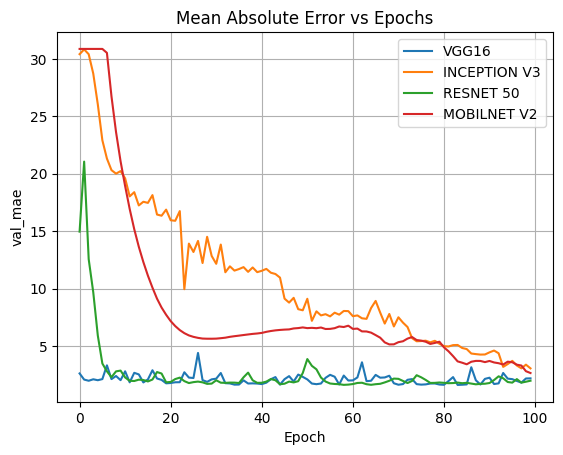

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_VGG16.history['val_mae'], label='VGG16')
plt.plot(history_InceptionV3.history['val_mae'], label='INCEPTION V3')
plt.plot(history_ResNet50.history['val_mae'], label='RESNET 50')
plt.plot(history_MobileNetV2.history['val_mae'], label='MOBILNET V2')
plt.grid()
plt.title('Mean Absolute Error vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('val_mae')
plt.legend()
plt.show()